In [26]:
import pandas as pd

In [27]:
full_data = pd.read_csv("la_liga_data_2014_2025.csv")

- We want to analyse the Spanish LaLiga sessions for the past 10 years
- We want to answer 3 questions:
1. Who is most likely to win LaLiga this year based on previous 10 years?
2. Who are the 2 teams that will most likely be relegated
3. Who is the team that will most likely go to conference league (7th position)

### Scrape datasets frorm Fbref.com

In [28]:
'''df_2014_2015 = pd.read_html('https://fbref.com/en/comps/12/2014-2015/2014-2015-La-Liga-Stats', 
                            attrs = {"id" : "results2014-2015121_overall" })[0]

df_2015_2016 = pd.read_html('https://fbref.com/en/comps/12/2015-2016/2015-2016-La-Liga-Stats', 
                            attrs = {"id" : "results2015-2016121_overall" })[0]

df_2016_2017 = pd.read_html('https://fbref.com/en/comps/12/2016-2017/2016-2017-La-Liga-Stats', 
                            attrs = {"id" : "results2016-2017121_overall" })[0]

df_2017_2018 = pd.read_html('https://fbref.com/en/comps/12/2017-2018/2017-2018-La-Liga-Stats', 
                            attrs = {"id" : "results2017-2018121_overall" })[0]

df_2018_2019 = pd.read_html('https://fbref.com/en/comps/12/2018-2019/2018-2019-La-Liga-Stats', 
                            attrs = {"id" : "results2018-2019121_overall" })[0]

df_2019_2020 = pd.read_html('https://fbref.com/en/comps/12/2019-2020/2019-2020-La-Liga-Stats', 
                            attrs = {"id" : "results2019-2020121_overall" })[0]

df_2020_2021 = pd.read_html('https://fbref.com/en/comps/12/2020-2021/2020-2021-La-Liga-Stats', 
                            attrs = {"id" : "results2020-2021121_overall" })[0]

df_2021_2022 = pd.read_html('https://fbref.com/en/comps/12/2021-2022/2021-2022-La-Liga-Stats', 
                            attrs = {"id" : "results2021-2022121_overall" })[0]

df_2022_2023 = pd.read_html('https://fbref.com/en/comps/12/2022-2023/2022-2023-La-Liga-Stats', 
                            attrs = {"id" : "results2022-2023121_overall" })[0]

df_2023_2024 = pd.read_html('https://fbref.com/en/comps/12/2023-2024/2023-2024-La-Liga-Stats', 
                            attrs = {"id" : "results2023-2024121_overall" })[0]

df_2024_2025 = pd.read_html('https://fbref.com/en/comps/12/2024-2025/2024-2025-La-Liga-Stats', 
                            attrs = {"id" : "results2024-2025121_overall" })[0]
'''

'df_2014_2015 = pd.read_html(\'https://fbref.com/en/comps/12/2014-2015/2014-2015-La-Liga-Stats\', \n                            attrs = {"id" : "results2014-2015121_overall" })[0]\n\ndf_2015_2016 = pd.read_html(\'https://fbref.com/en/comps/12/2015-2016/2015-2016-La-Liga-Stats\', \n                            attrs = {"id" : "results2015-2016121_overall" })[0]\n\ndf_2016_2017 = pd.read_html(\'https://fbref.com/en/comps/12/2016-2017/2016-2017-La-Liga-Stats\', \n                            attrs = {"id" : "results2016-2017121_overall" })[0]\n\ndf_2017_2018 = pd.read_html(\'https://fbref.com/en/comps/12/2017-2018/2017-2018-La-Liga-Stats\', \n                            attrs = {"id" : "results2017-2018121_overall" })[0]\n\ndf_2018_2019 = pd.read_html(\'https://fbref.com/en/comps/12/2018-2019/2018-2019-La-Liga-Stats\', \n                            attrs = {"id" : "results2018-2019121_overall" })[0]\n\ndf_2019_2020 = pd.read_html(\'https://fbref.com/en/comps/12/2019-2020/2019-2020-La-Liga-S

In [29]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [30]:
'''
# List of DataFrames 
dfs = [
    df_2014_2015, df_2015_2016, df_2016_2017, df_2017_2018, 
    df_2018_2019, df_2019_2020, df_2020_2021, df_2021_2022, 
    df_2022_2023, df_2023_2024, df_2024_2025
]

# Standardize column names
for df in dfs:
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Define expected columns (ensuring missing xG-related ones are included)
expected_columns = [
    "rk", "squad", "mp", "w", "d", "l", "gf", "ga", "gd", "pts", 
    "pts/mp", "attendance", "top_team_scorer", "goalkeeper", "notes",
    "xg", "xga", "xgd", "xgd/90"  # Expected goals columns missing in older data
]

# Add missing xG-related columns to older datasets (2014-2016)
for df in dfs[:3]:  # First three seasons (2014-2016) don’t have xG
    for col in ["xg", "xga", "xgd", "xgd/90"]:
        df[col] = None  # Fill missing expected goal stats with NaN

# Add a season column to track the year
years = list(range(2014, 2025))
for df, year in zip(dfs, years):
    df["season"] = year

# Concatenate all seasons into one Pandas DataFrame
full_data = pd.concat(dfs, ignore_index=True)
'''

'\n# List of DataFrames \ndfs = [\n    df_2014_2015, df_2015_2016, df_2016_2017, df_2017_2018, \n    df_2018_2019, df_2019_2020, df_2020_2021, df_2021_2022, \n    df_2022_2023, df_2023_2024, df_2024_2025\n]\n\n# Standardize column names\nfor df in dfs:\n    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")\n\n# Define expected columns (ensuring missing xG-related ones are included)\nexpected_columns = [\n    "rk", "squad", "mp", "w", "d", "l", "gf", "ga", "gd", "pts", \n    "pts/mp", "attendance", "top_team_scorer", "goalkeeper", "notes",\n    "xg", "xga", "xgd", "xgd/90"  # Expected goals columns missing in older data\n]\n\n# Add missing xG-related columns to older datasets (2014-2016)\nfor df in dfs[:3]:  # First three seasons (2014-2016) don’t have xG\n    for col in ["xg", "xga", "xgd", "xgd/90"]:\n        df[col] = None  # Fill missing expected goal stats with NaN\n\n# Add a season column to track the year\nyears = list(range(2014, 2025))\nfor df, year in zip(d

In [31]:
print(full_data.shape)
full_data.tail()

(220, 21)


,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,xg,xga,xgd,xgd/90,season,last_5
215,16,Valencia,28,6,10,12,31,46,-15,28,1.00,42618.0,Hugo Duro - 7,Giorgi Mamardashvili,NaN,31.5,40.3,-8.8,-0.31,2024,D L D W D
216,17,Alavés,28,6,9,13,32,42,-10,27,0.96,16862.0,Kiké - 11,Antonio Sivera,NaN,32.4,35.9,-3.5,-0.12,2024,D L D W D
217,18,Leganés,28,6,9,13,26,43,-17,27,0.96,10964.0,Dani Raba - 5,Marko Dmitrović,NaN,23.3,45.1,-21.9,-0.78,2024,D L W L L
218,19,Las Palmas,28,6,7,15,32,47,-15,25,0.89,23616.0,"Sandro Ramírez, Fábio Silva - 8",Jasper Cillessen,NaN,27.2,51.8,-24.6,-0.88,2024,L L D L D
219,20,Valladolid,28,4,4,20,18,63,-45,16,0.57,21121.0,"Mamadou Sylla, Selim Amallah... - 3",Karl Jakob Hein,NaN,23.9,49.6,-25.7,-0.92,2024,L L D L L


In [32]:
'''
full_data.to_csv("la_liga_data_2014_2025.csv", index=False)
print("Data saved successfully!")
'''

'\nfull_data.to_csv("la_liga_data_2014_2025.csv", index=False)\nprint("Data saved successfully!")\n'

In [33]:
####### Winning teams of the past 10 years

# Filter the dataset for teams that finished 1st each season
winning_teams = full_data[full_data["rk"] == 1][["season", "squad", "pts", "pts/mp", "gd"]].sort_values("season")

# Display the results
print(winning_teams)

     season            squad  pts  pts/mp  gd
0      2014        Barcelona   94    2.47  89
20     2015        Barcelona   91    2.39  83
40     2016      Real Madrid   93    2.45  65
60     2017        Barcelona   93    2.45  70
80     2018        Barcelona   87    2.29  54
100    2019      Real Madrid   87    2.29  45
120    2020  Atlético Madrid   86    2.26  42
140    2021      Real Madrid   86    2.26  49
160    2022        Barcelona   88    2.32  50
180    2023      Real Madrid   95    2.50  61
200    2024        Barcelona   60    2.22  48


In [34]:
# Filter for winning teams from the past 10 years, excluding the current season
winning_teams_past_10 = full_data[(full_data["rk"] == 1) & (full_data["season"] < 2024)]

# Compute the average 'pts/mp' for the past 10 winning teams
avg_pts_mp_winners = winning_teams_past_10["pts/mp"].mean()

# Display the result
print(f"Average Pts/MP for past 10 winning teams (excluding this year): {avg_pts_mp_winners:.2f}")

Average Pts/MP for past 10 winning teams (excluding this year): 2.37


In [35]:
# Convert 'rk' to binary (1 if team won the league, 0 otherwise)
full_data["is_champion"] = (full_data["rk"] == 1).astype(int)

# Filter only championship-winning teams
champions_only = full_data[full_data["is_champion"] == 1]

# Compute correlation between 'pts/mp' and season rankings only for champions
champion_correlation = champions_only["pts/mp"].corr(champions_only["rk"])

print(f"Correlation between pts/mp and ranking (only champions): {champion_correlation}")


Correlation between pts/mp and ranking (only champions): nan


/Applications/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Applications/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


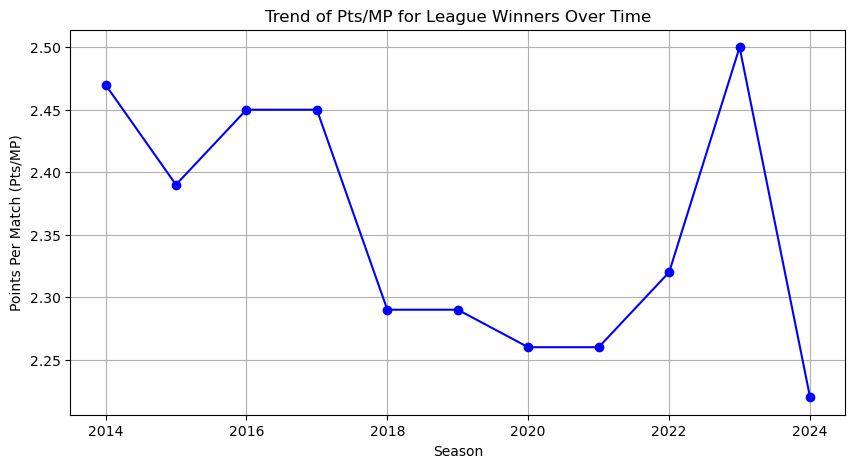

In [36]:
import matplotlib.pyplot as plt

# Plot trend of 'pts/mp' for champions over the years
plt.figure(figsize=(10, 5))
plt.plot(champions_only["season"], champions_only["pts/mp"], marker="o", linestyle="-", color="b")
plt.xlabel("Season")
plt.ylabel("Points Per Match (Pts/MP)")
plt.title("Trend of Pts/MP for League Winners Over Time")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
import numpy as np

# Ensure "games_left" exists
full_data["games_left"] = 38 - full_data["mp"]

# Filter past seasons for training
df_train = full_data[full_data["season"] < 2024]
df_test = full_data[full_data["season"] == 2024]

# Define input features
features = ["pts/mp", "gd", "w", "l", "games_left"]

X_train = df_train[features]
y_train = df_train["is_champion"]  # 1 if champion, 0 otherwise

X_test = df_test[features]

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict probabilities for current season
df_test["win_probability"] = model.predict_proba(X_test_scaled)[:, 1]  # Probability of winning

# Convert to percentage
df_test["win_probability"] = df_test["win_probability"] / df_test["win_probability"].sum() * 100

# Round to 3 decimal places
df_test["win_probability"] = df_test["win_probability"].round(3)

# Rename for clarity
df_test.rename(columns={"win_probability": "win_probability (%)"}, inplace=True)

# Display the results
df_test = df_test[["squad", "w", "l", "pts/mp", "gd", "xgd/90", "games_left", "pts", "win_probability (%)"]].sort_values("win_probability (%)", ascending=False)

df_test

/var/folders/1h/14p077t95lbcy6x5tc6bqx3h0000gn/T/ipykernel_18271/375467340.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["win_probability"] = model.predict_proba(X_test_scaled)[:, 1]  # Probability of winning
/var/folders/1h/14p077t95lbcy6x5tc6bqx3h0000gn/T/ipykernel_18271/375467340.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["win_probability"] = df_test["win_probability"] / df_test["win_probability"].sum() * 100
/var/folders/1h/14p077t95lbcy6x5tc6bqx3h0000gn/T/ipykernel_1827

,squad,w,l,pts/mp,gd,xgd/90,games_left,pts,win_probability (%)
200,Barcelona,19,5,2.22,48,1.30,11,60,73.333
201,Real Madrid,18,4,2.14,32,0.87,10,60,13.333
202,Atlético Madrid,16,4,2.00,24,0.68,10,56,6.667
203,Athletic Club,14,4,1.86,22,0.61,10,52,6.667
212,Girona,9,12,1.21,-5,-0.10,10,34,0.000
218,Las Palmas,6,15,0.89,-15,-0.88,10,25,0.000
217,Leganés,6,13,0.96,-17,-0.78,10,27,0.000
216,Alavés,6,13,0.96,-10,-0.12,10,27,0.000
215,Valencia,6,12,1.00,-15,-0.31,10,28,0.000
214,Espanyol,7,13,1.04,-13,-0.85,11,28,0.000


In [ ]:
# Create a "championship likelihood" score instead of pure 0/1
full_data["championship_likelihood"] = full_data["pts"] / full_data.groupby("season")["pts"].transform("max")


- Test text here for GIT